#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("/workspaces/student-lecture-materials-jlin119/10-week10/lab/sample_data_with_outliers.csv")

<Axes: >

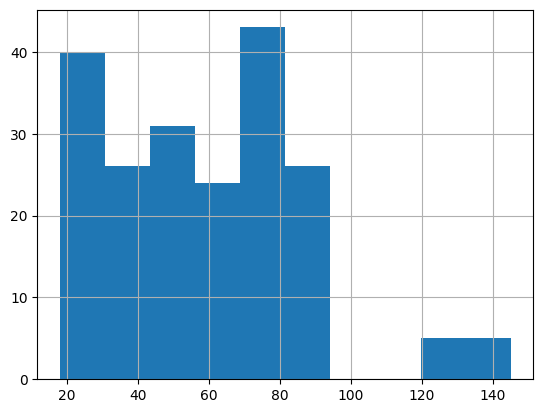

In [49]:
data['Age'].hist()

Age            Axes(0.125,0.11;0.227941x0.77)
Income      Axes(0.398529,0.11;0.227941x0.77)
Purchase    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

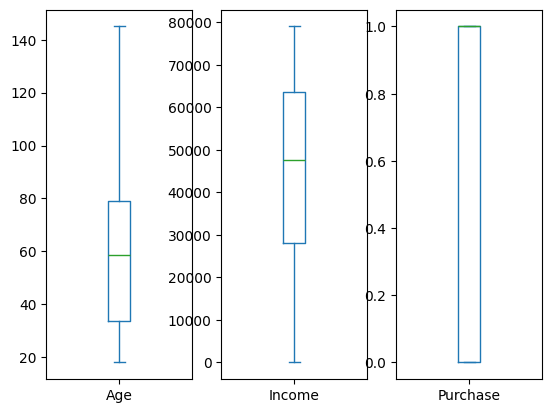

In [50]:
data.plot.box(subplots = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x70e94af5d220>,
 'caps': [<matplotlib.lines.Line2D at 0x70e94af5d7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x70e94af5cf20>],
 'medians': [<matplotlib.lines.Line2D at 0x70e94af5dbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70e94af5ddc0>],
 'means': []}

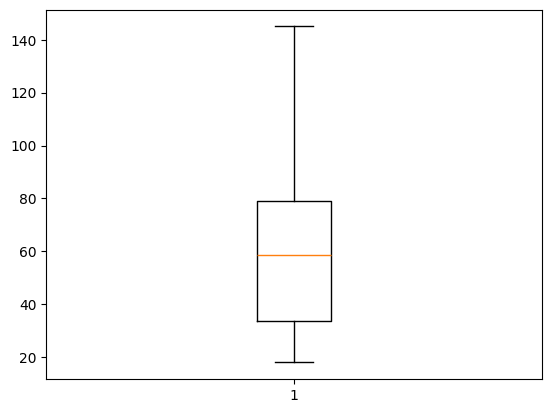

In [51]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x70e94af6c650>,
 'caps': [<matplotlib.lines.Line2D at 0x70e94af6cda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x70e94af6c350>],
 'medians': [<matplotlib.lines.Line2D at 0x70e94af6d1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70e94af6d490>],
 'means': []}

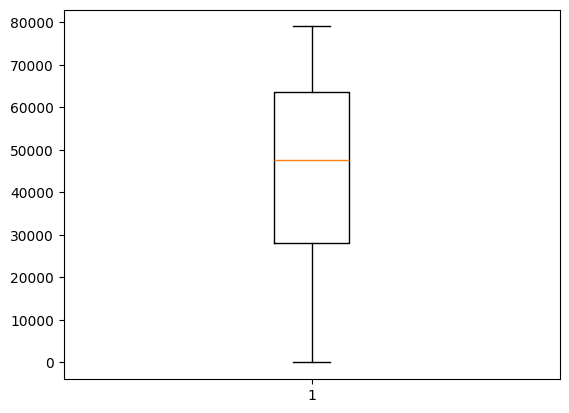

In [52]:
plt.boxplot(data['Income'])

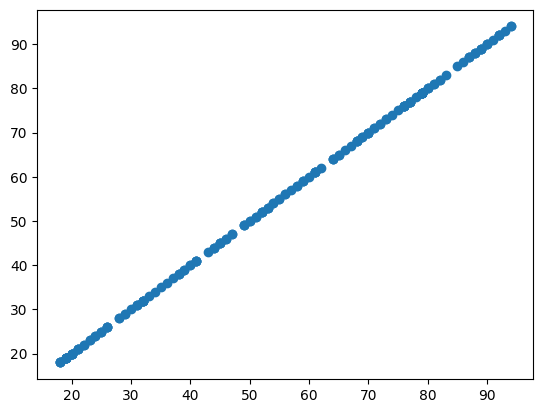

In [53]:
plt.scatter(data[data['Age'] < 100]['Age'], data[data['Age'] < 100]['Age'])

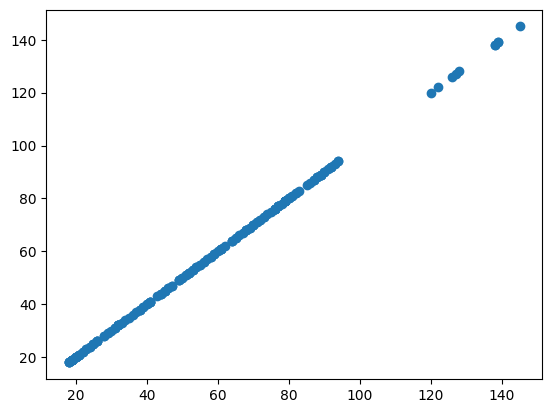

In [54]:
plt.scatter(data['Age'], data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x70e94b7f1970>,
 'caps': [<matplotlib.lines.Line2D at 0x70e94b7f0080>,
 'boxes': [<matplotlib.lines.Line2D at 0x70e94b7f0590>],
 'medians': [<matplotlib.lines.Line2D at 0x70e94b7f21b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x70e94b7f1e50>],
 'means': []}

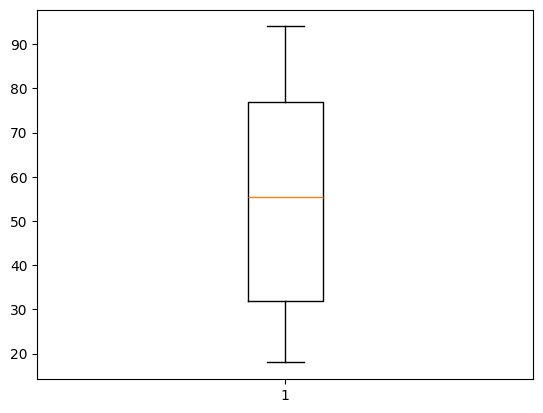

In [55]:
plt.boxplot(data[data['Age'] < 100]['Age'])

In [56]:
data[data['Income'] < 1000]

,Age,Income,Purchase
48,89,5,0
49,76,97,0
59,79,98,0
62,70,33,1
67,127,70,0
73,126,33,0
77,122,84,0
86,52,54,1
108,120,20,0
122,128,46,0


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np

data2 = pd.read_csv("/workspaces/student-lecture-materials-jlin119/10-week10/lab/sample_data_with_outliers.csv")

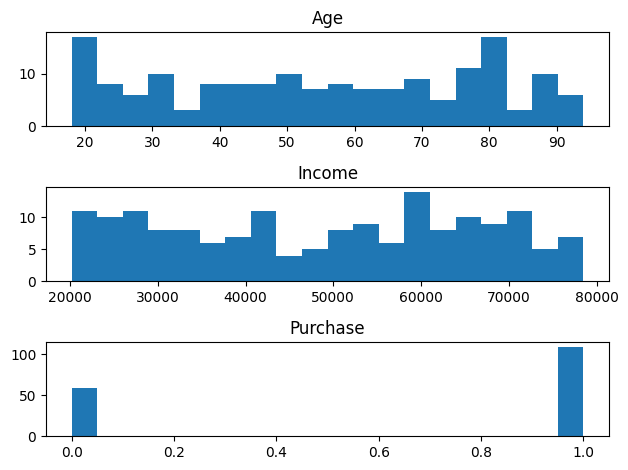

In [80]:
iso_forest = IsolationForest(contamination=0.16, random_state=42)
# contamination: about what percentage of data you think is outliers
outliers = iso_forest.fit_predict(data2)

filter = data2[outliers == 1] # 1 is not an outlier
plot_data(filter)

In [75]:
X_iforest['Age']

0      76
1      88
2      82
3      81
4      62
       ..
195    61
196    64
197    46
198    29
199    64
Name: Age, Length: 180, dtype: int64

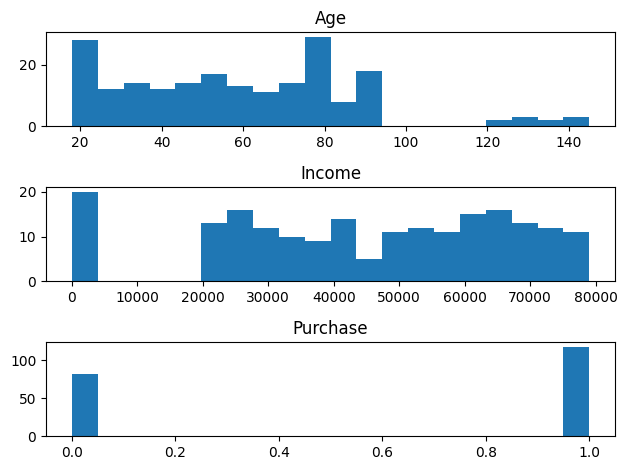

In [62]:
def plot_data(df):
    fig, axes = plt.subplots(3) # get axes to make subplots
    for idx, column in enumerate(df):
        axes[idx].hist(df[column], bins = 20)
        axes[idx].set_title(column)
    plt.tight_layout() # makes sure that you don't have
plot_data(data2)

In [66]:
from scipy.stats import zscore
z_scores = data.apply(zscore)
z_scores

,Age,Income,Purchase
0,0.600017,1.349827,0.833616
1,1.020468,0.786128,-1.199593
2,0.810243,0.764277,0.833616
3,0.775205,0.983641,0.833616
4,0.109492,-0.634154,-1.199593
...,...,...,...
195,0.074455,0.713096,0.833616
196,0.179567,0.227593,0.833616
197,-0.451108,-0.890369,-1.199593
198,-1.046746,0.717547,0.833616


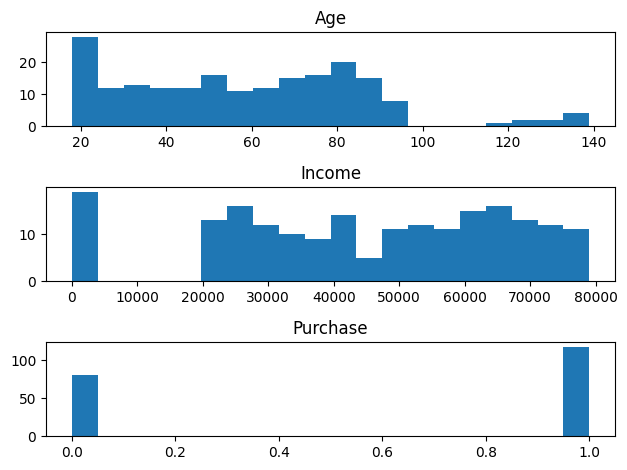

In [70]:
threshold = 3
df_zfiltered = data[(z_scores < threshold).all(axis = 1)]
plot_data(df_zfiltered)

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


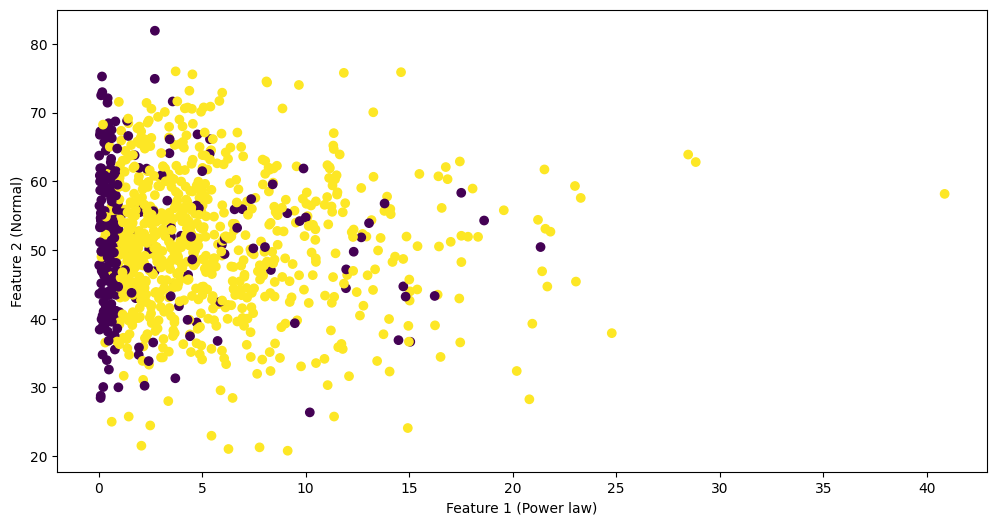

In [93]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


(array([570., 235., 110.,  49.,  20.,  12.,   2.,   1.,   0.,   1.]),
 array([2.32139203e-02, 4.10711533e+00, 8.19101673e+00, 1.22749181e+01,
        1.63588195e+01, 2.04427210e+01, 2.45266224e+01, 2.86105238e+01,
        3.26944252e+01, 3.67783266e+01, 4.08622280e+01]),
 <BarContainer object of 10 artists>)

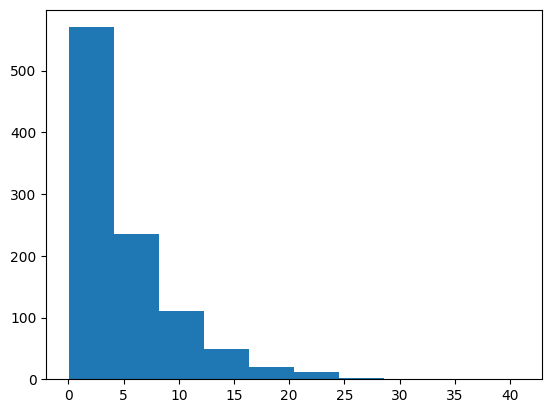

In [87]:
plt.hist(X[:,0])

(array([100., 128., 130., 152., 178., 133., 103.,  58.,  15.,   3.]),
 array([0.02294858, 0.39409211, 0.76523565, 1.13637919, 1.50752272,
        1.87866626, 2.24980979, 2.62095333, 2.99209687, 3.3632404 ,
        3.73438394]),
 <BarContainer object of 10 artists>)

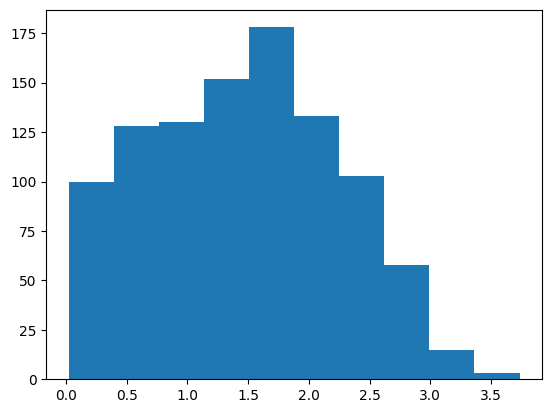

In [94]:
X_scaled = X.copy()
X_scaled[:,0] = np.log1p(X[:,0])
plt.hist(X_scaled[:,0])

Logistic Regression without Scaling - Test Accuracy: 0.92


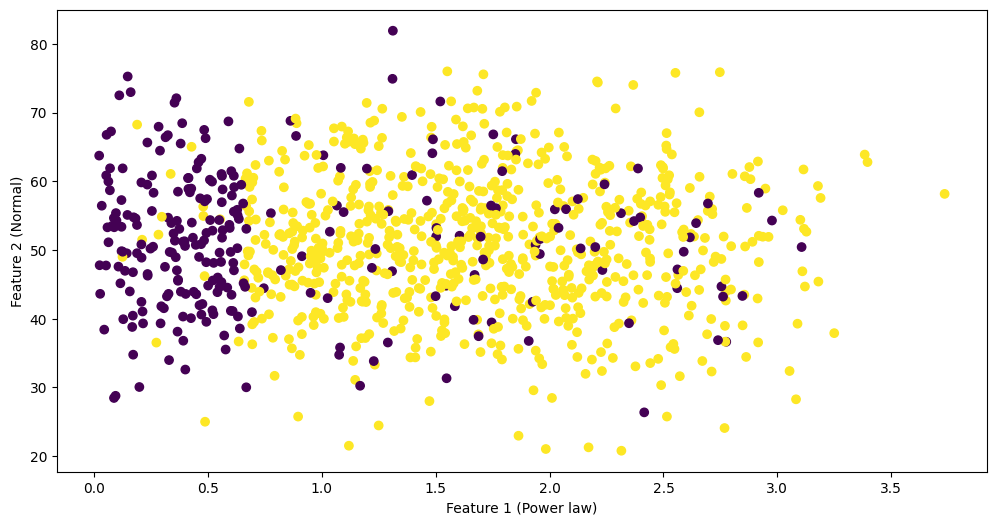

In [96]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()

#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [ ]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here

#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

BONUS: See if you can figure out how to add SMOTE to the pipeline